In [2]:
# === 1. Importaciones ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# === 2. Carga del dataset ===
path = os.path.join("..", "data", "raw", "900k Definitive Spotify Dataset.json")
df = pd.read_json(path, lines=True)
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similar Songs
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,2013-04-29,D min,0.437870,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Corey Smith', 'Similar ..."
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,2013-04-29,A# min,0.508876,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Hiroyuki Sawano', 'Simi..."
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,2004-06-08,A Maj,0.532544,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Ricky Dillard', 'Simila..."
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,2015-10-16,A min,0.538462,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Eric Clapton', 'Similar..."
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,2015-10-16,F min,0.544379,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Cibo Matto', 'Similar S..."


In [4]:
# === 3. Info y valores nulos ===
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498052 entries, 0 to 498051
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       498052 non-null  object 
 1   song                            498038 non-null  object 
 2   text                            498052 non-null  object 
 3   Length                          498052 non-null  object 
 4   emotion                         498052 non-null  object 
 5   Genre                           498052 non-null  object 
 6   Album                           498052 non-null  object 
 7   Release Date                    350369 non-null  object 
 8   Key                             498052 non-null  object 
 9   Tempo                           498052 non-null  float64
 10  Loudness (db)                   498052 non-null  float64
 11  Time signature                  498044 non-null  object 
 12  Explicit        

Release Date                      147683
song                                  14
Time signature                         8
Length                                 0
emotion                                0
Artist(s)                              0
text                                   0
Album                                  0
Genre                                  0
Tempo                                  0
Key                                    0
Loudness (db)                          0
Explicit                               0
Popularity                             0
Energy                                 0
Danceability                           0
Positiveness                           0
Speechiness                            0
Liveness                               0
Acousticness                           0
Instrumentalness                       0
Good for Party                         0
Good for Work/Study                    0
Good for Relaxation/Meditation         0
Good for Exercis

In [5]:
# === 4. Estadísticas descriptivas ===
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tempo,498052.0,0.531244,0.173153,0.0,0.390533,0.526627,0.64497,1.0
Loudness (db),498052.0,0.762177,0.072970,0.0,0.728743,0.777616,0.81141,1.0
Popularity,498052.0,30.486453,17.189269,0.0,19.000000,28.000000,40.00000,100.0
Energy,498052.0,62.744027,22.688164,0.0,48.000000,65.000000,81.00000,100.0
Danceability,498052.0,58.285191,17.352930,6.0,46.000000,59.000000,71.00000,99.0
Positiveness,498052.0,47.067467,24.091678,0.0,28.000000,46.000000,66.00000,100.0
Speechiness,498052.0,11.397157,12.282150,2.0,4.000000,6.000000,14.00000,97.0
Liveness,498052.0,19.787725,16.310829,1.0,10.000000,13.000000,25.00000,100.0
Acousticness,498052.0,26.056827,29.618874,0.0,2.000000,13.000000,44.00000,100.0
Instrumentalness,498052.0,7.361777,20.736406,0.0,0.000000,0.000000,0.00000,100.0


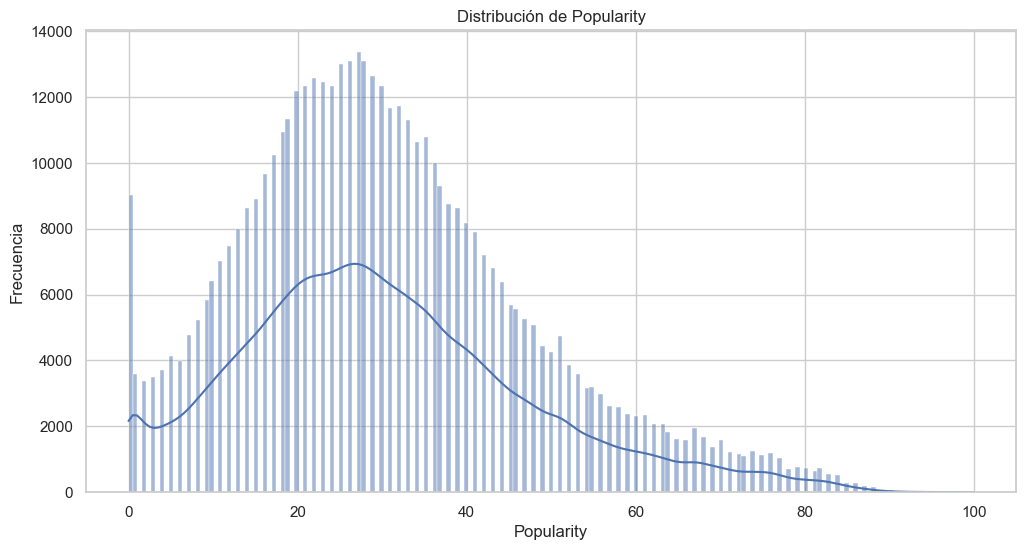

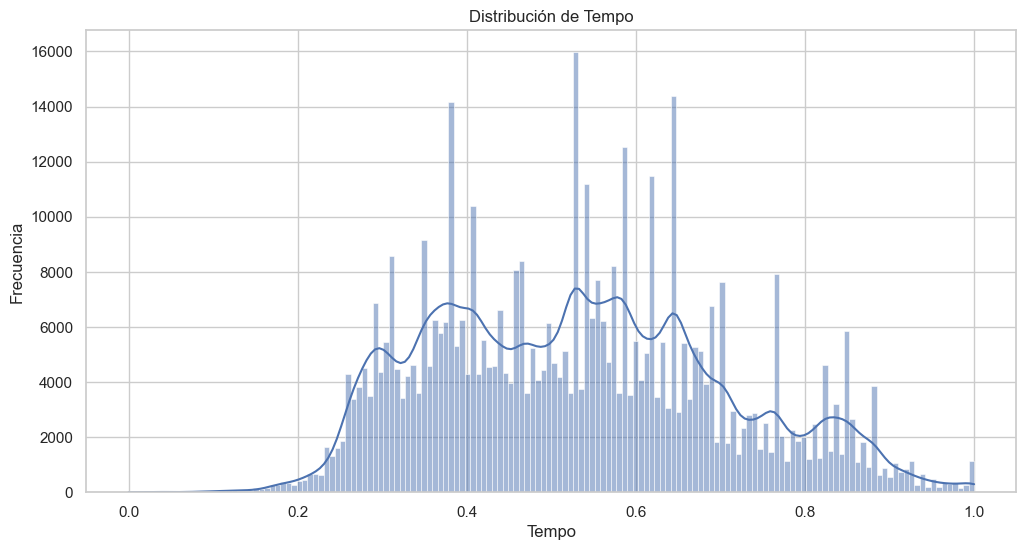

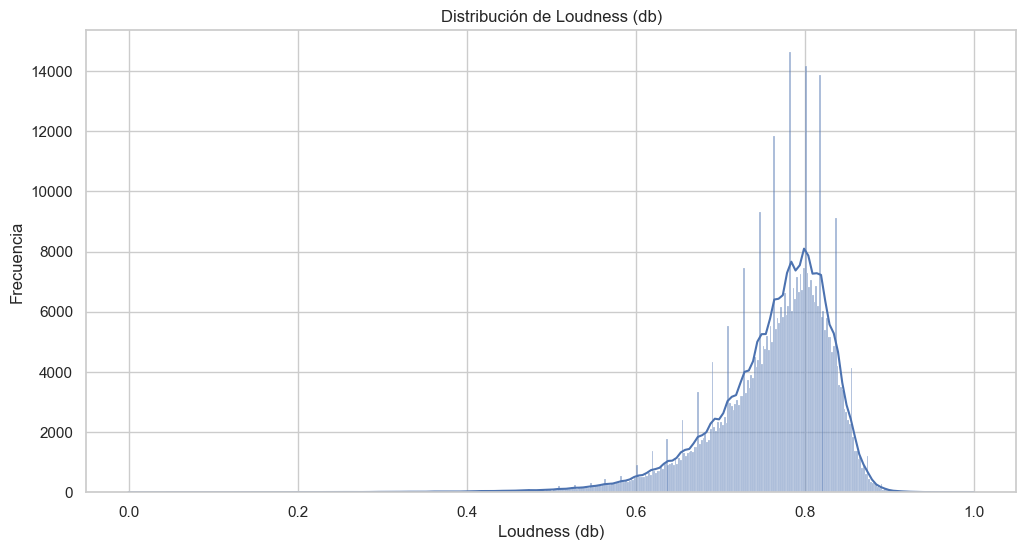

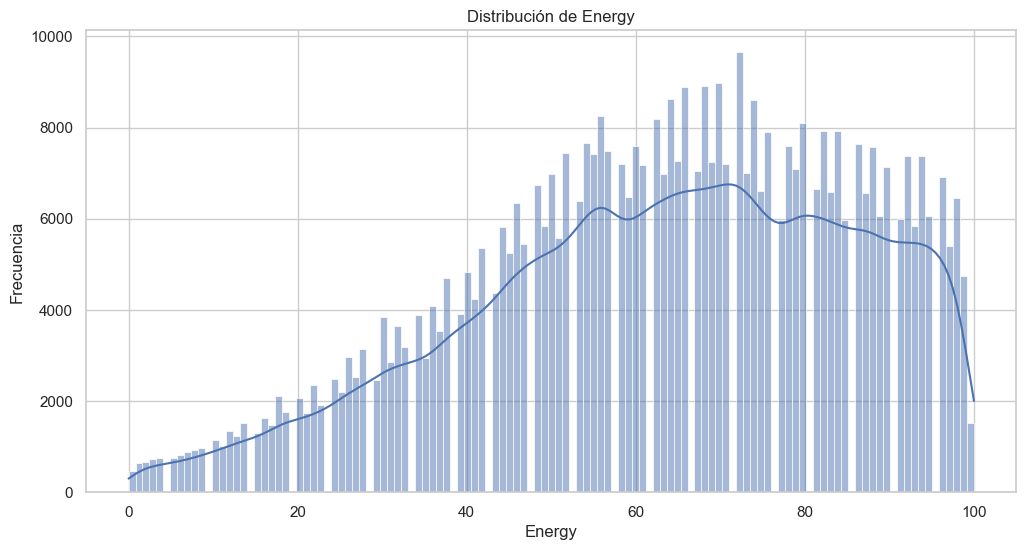

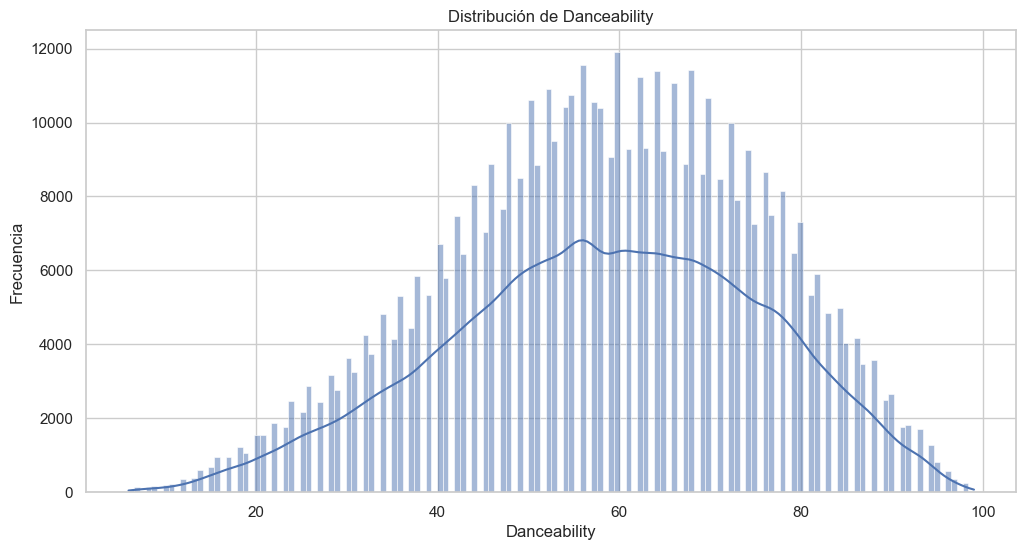

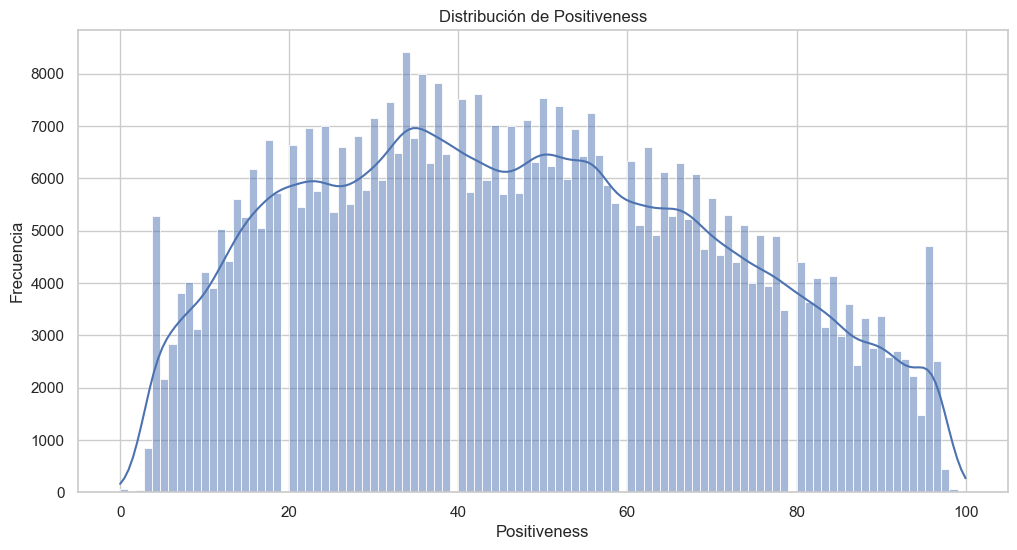

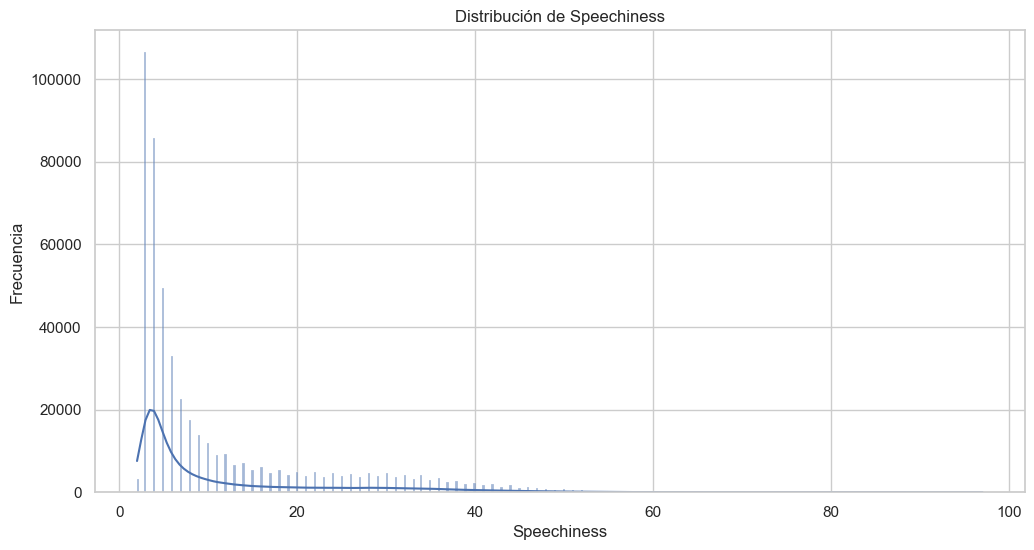

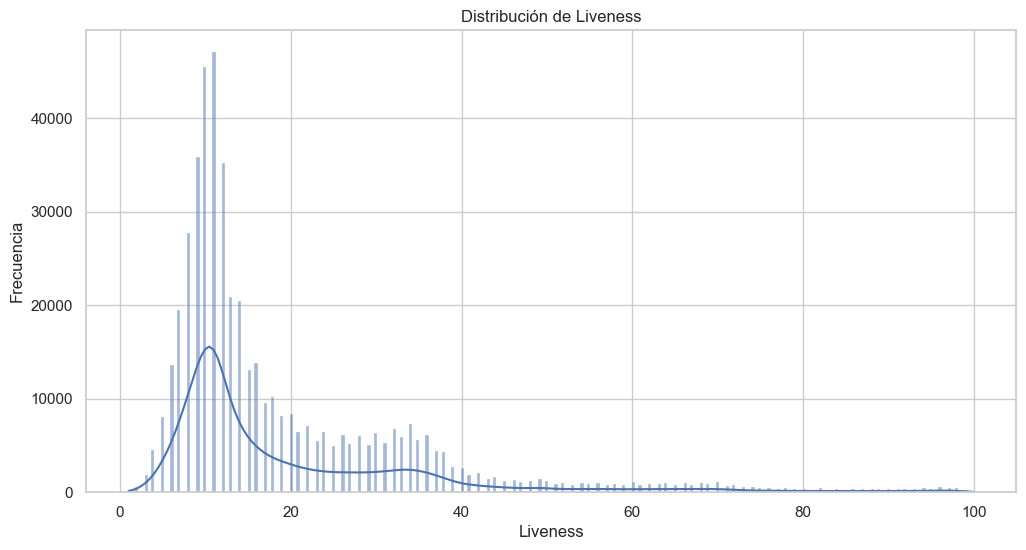

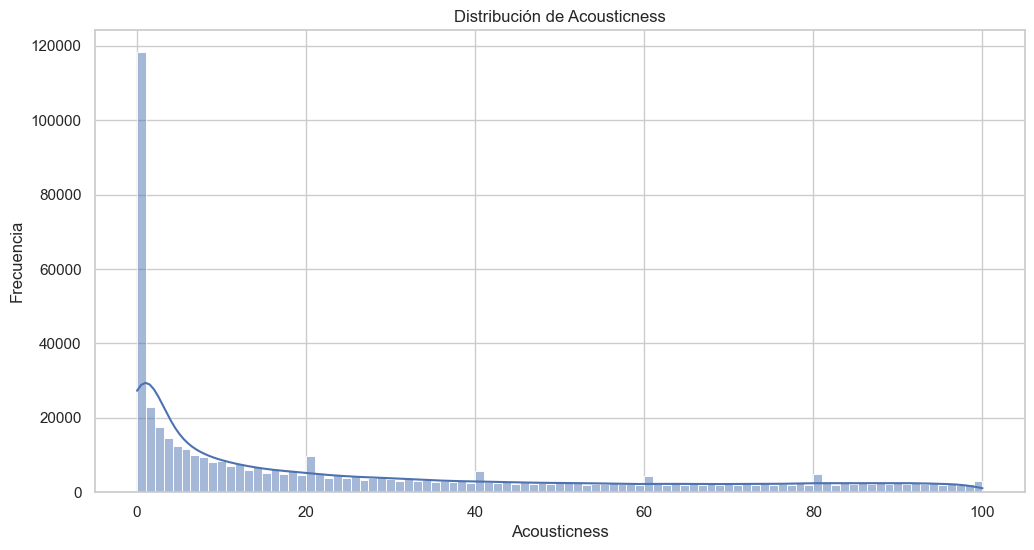

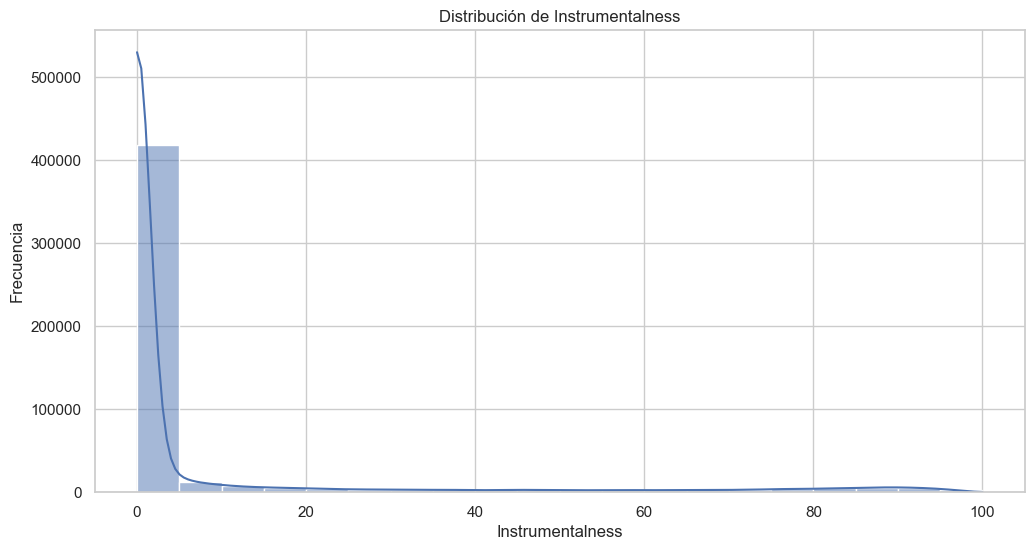

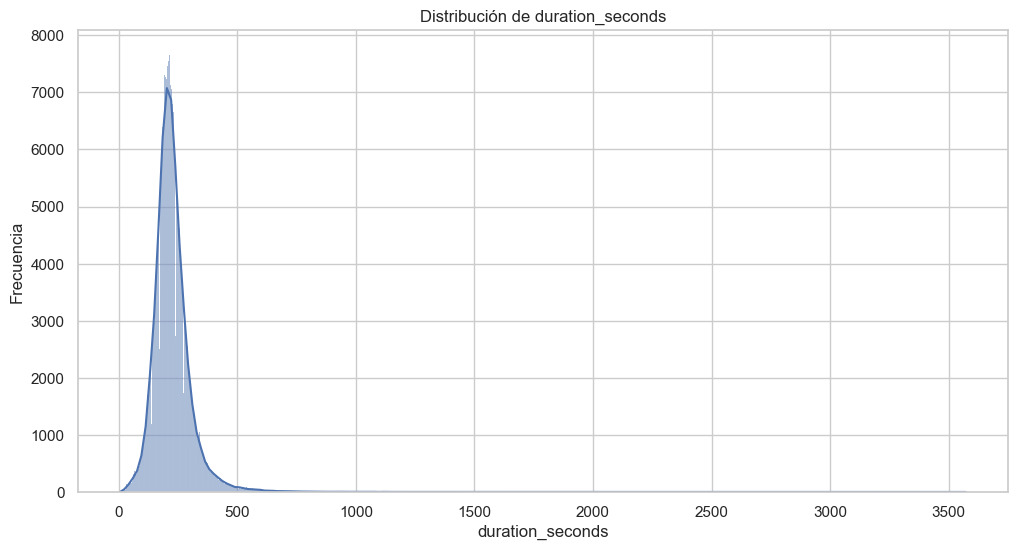

In [17]:
# Convertir 'Length' de formato "mm:ss" a segundos
def length_to_seconds(length_str):
    try:
        minutes, seconds = map(int, length_str.split(":"))
        return minutes * 60 + seconds
    except:
        return None

df['duration_seconds'] = df['Length'].apply(length_to_seconds)

# === 5. Distribuciones de variables clave ===
plot_cols = ['Popularity', 'Tempo', 'Loudness (db)', 'Energy', 'Danceability',
             'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness','duration_seconds']

for col in plot_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

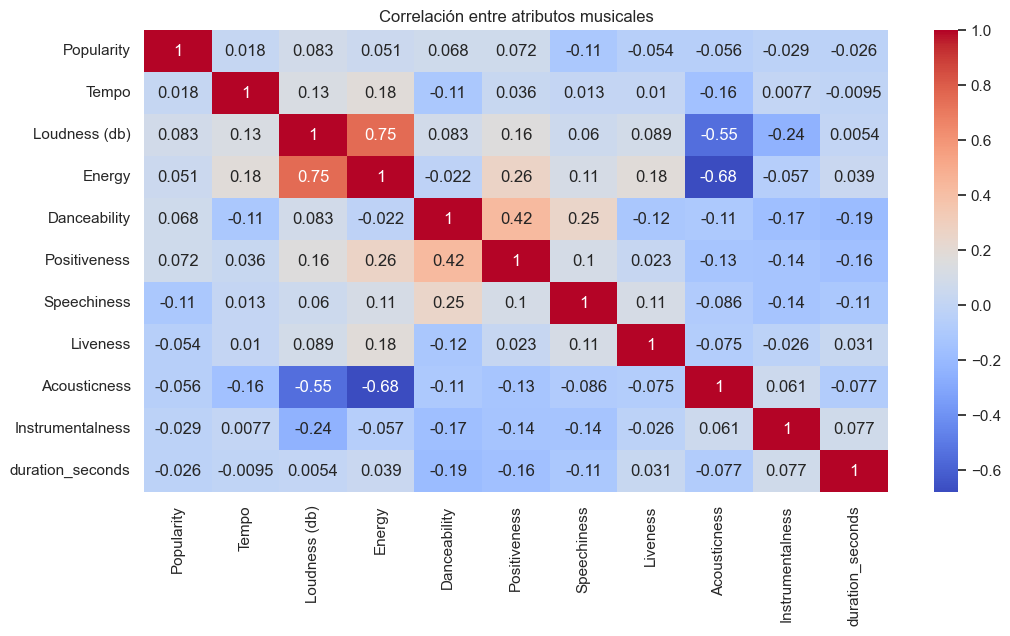

In [18]:
# === 6. Matriz de correlación ===
corr = df[plot_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre atributos musicales")
plt.show()

In [19]:
# === 7. Popularidad: top/bottom canciones ===
top10 = df.nlargest(10, 'Popularity')[['song', 'Artist(s)', 'Popularity']]
bottom10 = df.nsmallest(10, 'Popularity')[['song', 'Artist(s)', 'Popularity']]
print("🎵 Top 10 canciones más populares")
display(top10)
print("🎵 10 canciones menos populares")
display(bottom10)


🎵 Top 10 canciones más populares


,song,Artist(s),Popularity
46908,H.M.T,Billie Eilish,100
46847,E.T.,Billie Eilish,99
46882,HI,Billie Eilish,99
46887,Birds of a Feather,Billie Eilish,99
46889,So So,Billie Eilish,99
46900,Slipping Away Original Mix,Billie Eilish,99
367728,U,Sabrina Carpenter,99
367732,Alien,Sabrina Carpenter,99
367742,I Cant Stop Me,Sabrina Carpenter,99
367756,Wildside,Sabrina Carpenter,99


🎵 10 canciones menos populares


,song,Artist(s),Popularity
18,Stay,!Marc¡,0
237,A Very Bieber Christmas,#1 Holiday Carolers,0
246,So Into You Remix,$$$ PRIN$E,0
247,Rage Mode,$4pphire G4ng,0
349,On Drugs.,"$pacely,DarkoVibes",0
744,We Out Here,$Wagg Dinero,0
748,Detroit,"$windle,teejay X6,Kasherquon",0
771,Track 9 t,'68,0
869,Joy,*JOY*,0
870,Toxic,*KENNY,0


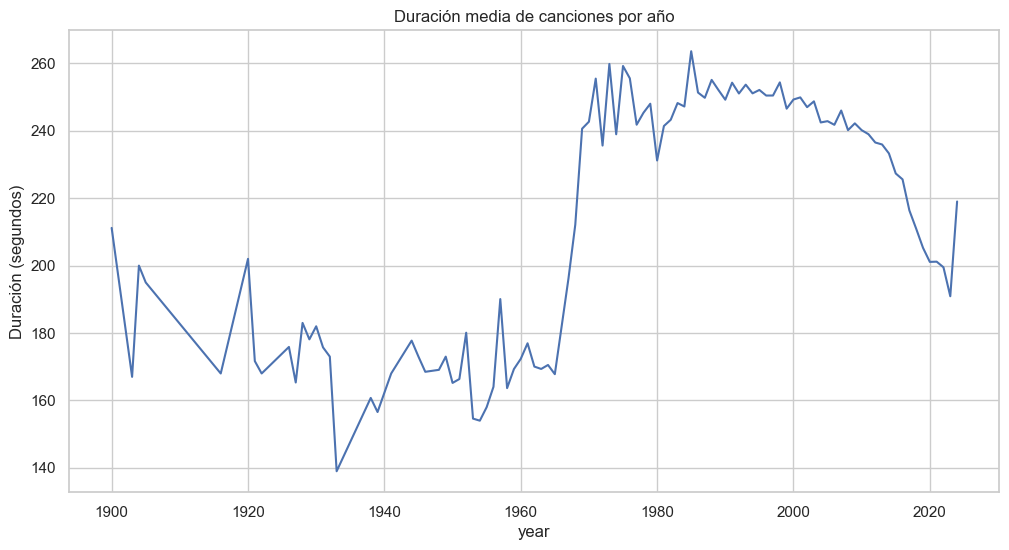

In [20]:
# === 8. Fecha y tendencia de duración ===
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['year'] = df['Release Date'].dt.year
dur_year = df.groupby('year')['duration_seconds'].mean().dropna()
dur_year.plot()
plt.title("Duración media de canciones por año")
plt.ylabel("Duración (segundos)")
plt.show()

In [28]:
# === 9. Vectores musicales: clustering exploratorio opcional ===
acoustic_cols = [
    'Acousticness', 'Danceability', 'Energy', 'Positiveness', 'Speechiness',
    'Liveness', 'Instrumentalness', 'Tempo', 'Loudness (db)', 'Popularity'
]

# Verificar qué columnas están realmente en el DataFrame
acoustic_cols = [col for col in acoustic_cols if col in df.columns]
print("Número de atributos acústicos utilizados:", len(acoustic_cols))

# Mostrar los vectores como listas
sample_vectors = df[acoustic_cols].dropna().iloc[:5].apply(lambda row: list(row), axis=1)
display(sample_vectors)


Número de atributos acústicos utilizados: 10


0    [11.0, 71.0, 83.0, 87.0, 4.0, 16.0, 0.0, 0.437...
1    [0.0, 70.0, 85.0, 87.0, 4.0, 32.0, 0.0, 0.5088...
2    [0.0, 71.0, 89.0, 63.0, 8.0, 64.0, 20.0, 0.532...
3    [12.0, 78.0, 84.0, 97.0, 4.0, 12.0, 0.0, 0.538...
4    [4.0, 77.0, 71.0, 70.0, 7.0, 10.0, 1.0, 0.5443...
dtype: object

In [31]:
# === 10. Guardar resultados resumidos ===
df.describe().to_csv("../data/processed/stats_summary.csv")
print("Resumen estadístico exportado a `data/processed/stats_summary.csv`")

Resumen estadístico exportado a `data/processed/stats_summary.csv`
